# Q1


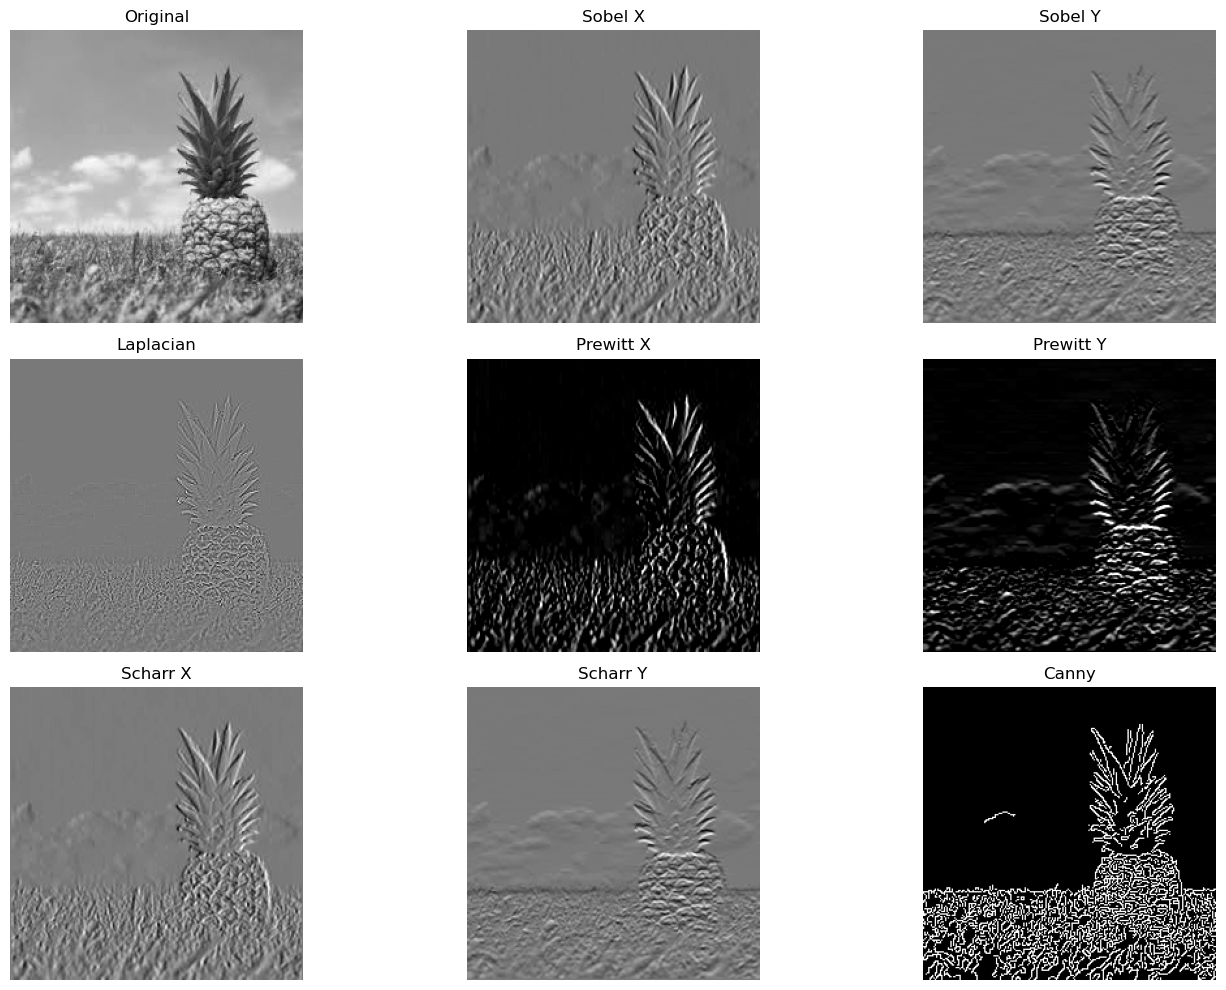

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image path
image_path = 'pineapple.jfif'

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image '{image_path}'")
else:
    # Apply different edge detectors
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    canny = cv2.Canny(image, 100, 200)

    # Display the results
    titles = ['Original', 'Sobel X', 'Sobel Y', 'Laplacian', 'Prewitt X', 'Prewitt Y', 'Scharr X', 'Scharr Y', 'Canny']
    images = [image, sobel_x, sobel_y, laplacian, prewitt_x, prewitt_y, scharr_x, scharr_y, canny]

    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Q2

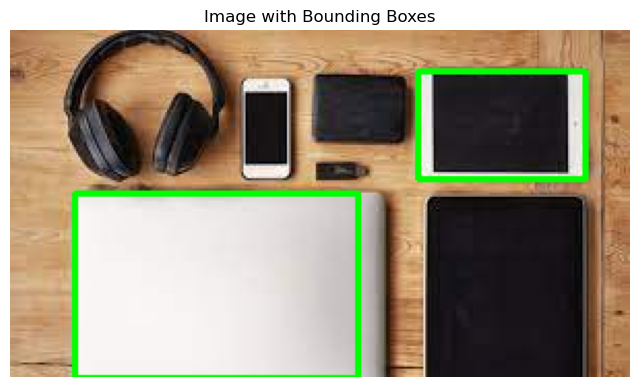

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'electronic.jfif'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image '{image_path}'")
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment white regions
    _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw bounding boxes
    image_with_boxes = image.copy()

    # Draw bounding boxes around the white objects
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Image with Bounding Boxes')
    plt.axis('off')
    plt.show()



# Q3


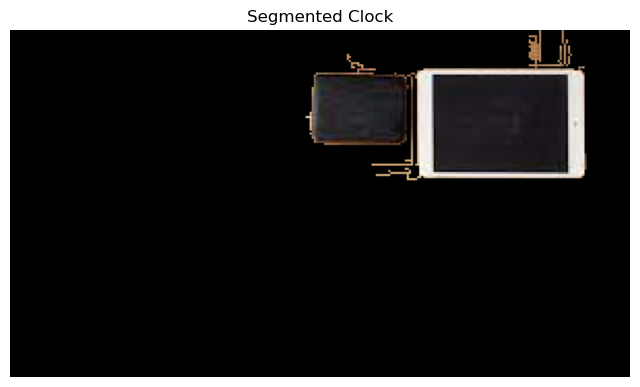

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'electronic.jfif'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter and isolate the clock contour
clock_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 2000:
        clock_contour = contour
        break

if clock_contour is not None:
    # Create a mask for the clock contour
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [clock_contour], -1, 255, thickness=cv2.FILLED)

    # Extract the clock from the original image using the mask
    segmented_clock = cv2.bitwise_and(image, image, mask=mask)

    # Display the segmented clock
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(segmented_clock, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Clock')
    plt.axis('off')
    plt.show()
else:
    print("No suitable clock contour found.")

